In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  

In [2]:
df = pd.read_csv("data/AirPassengers.csv")
df["Month"] = pd.to_datetime(df["Month"])
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [3]:
df["Month"][1] - df["Month"][0]

Timedelta('31 days 00:00:00')

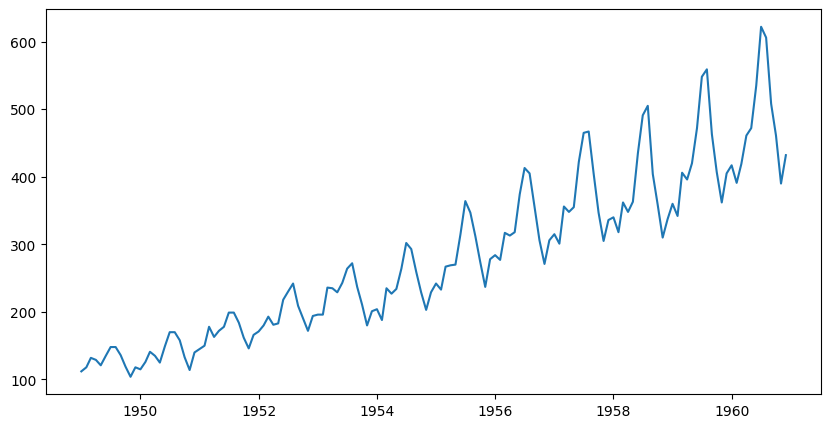

In [4]:
_ = plt.figure(figsize=(10, 5))
plt.plot(df["Month"], df["#Passengers"])
plt.show()

/var/folders/bj/29t6z1r11lb7j3cmky0fs7p80000gn/T/ipykernel_85756/4017038392.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Month'], dtype='object')
  quarterly_trend = df.rolling(window=3).mean()
/var/folders/bj/29t6z1r11lb7j3cmky0fs7p80000gn/T/ipykernel_85756/4017038392.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Month'], dtype='object')
  yearly_trend = df.rolling(window=12).mean()


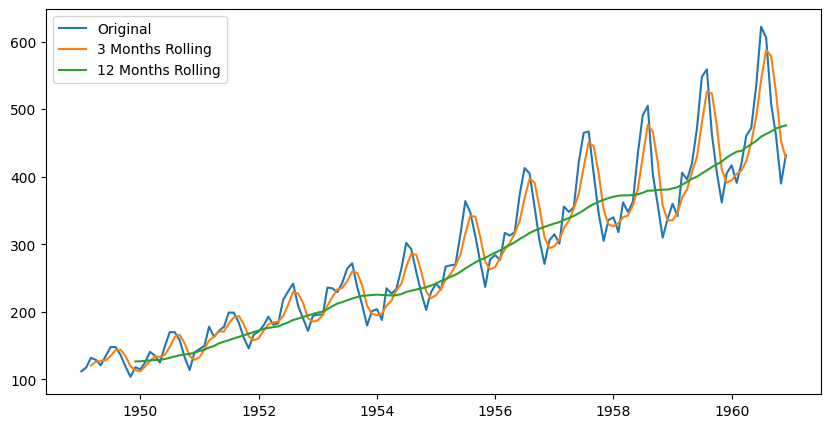

In [5]:
quarterly_trend = df.rolling(window=3).mean()
yearly_trend = df.rolling(window=12).mean()
_ = plt.figure(figsize=(10, 5))
plt.plot(df["Month"], df["#Passengers"], label="Original")
plt.plot(df["Month"], quarterly_trend, label="3 Months Rolling")
plt.plot(df["Month"], yearly_trend, label="12 Months Rolling")
plt.legend()
plt.show()

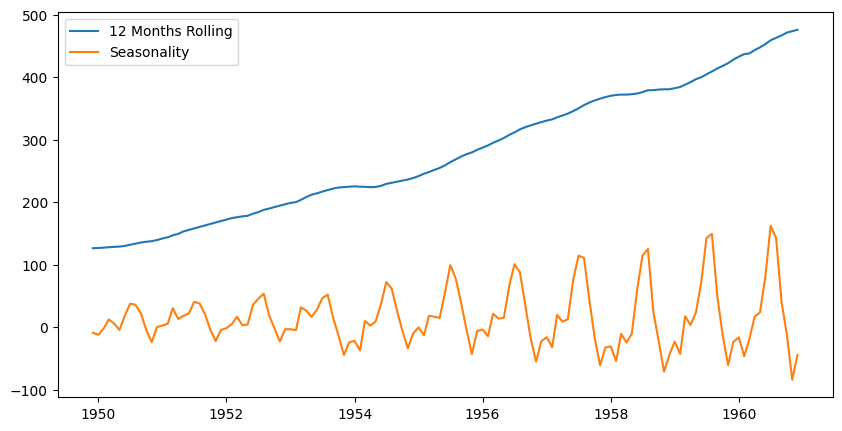

In [6]:
seasonality = df["#Passengers"].values - yearly_trend.values.T[0]
_ = plt.figure(figsize=(10, 5))
plt.plot(df["Month"], yearly_trend, label="12 Months Rolling")
plt.plot(df["Month"], seasonality, label="Seasonality")
plt.legend()
plt.show()

/var/folders/bj/29t6z1r11lb7j3cmky0fs7p80000gn/T/ipykernel_85756/2471146423.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Month'], dtype='object')
  rolling_std = df.rolling(window=12).std()


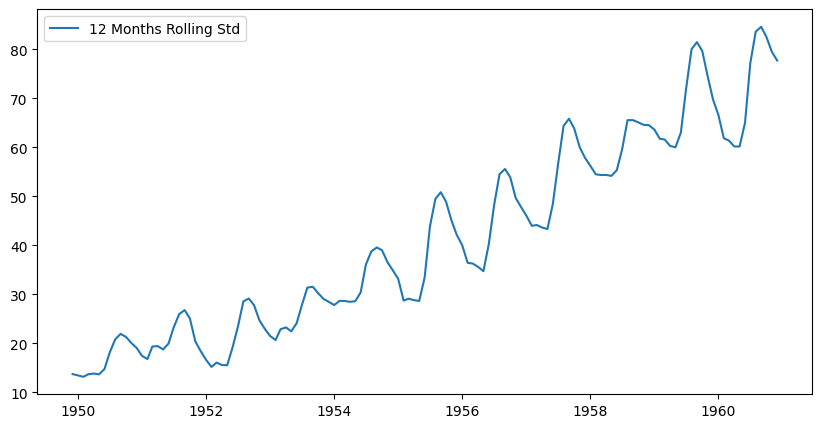

In [7]:
rolling_std = df.rolling(window=12).std()
_ = plt.figure(figsize=(10, 5))
plt.plot(df["Month"], rolling_std, label="12 Months Rolling Std")
plt.legend()
plt.show()

/var/folders/bj/29t6z1r11lb7j3cmky0fs7p80000gn/T/ipykernel_85756/4079436964.py:5: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Month'], dtype='object')
  yearly_trend = df.rolling(window=12).mean()


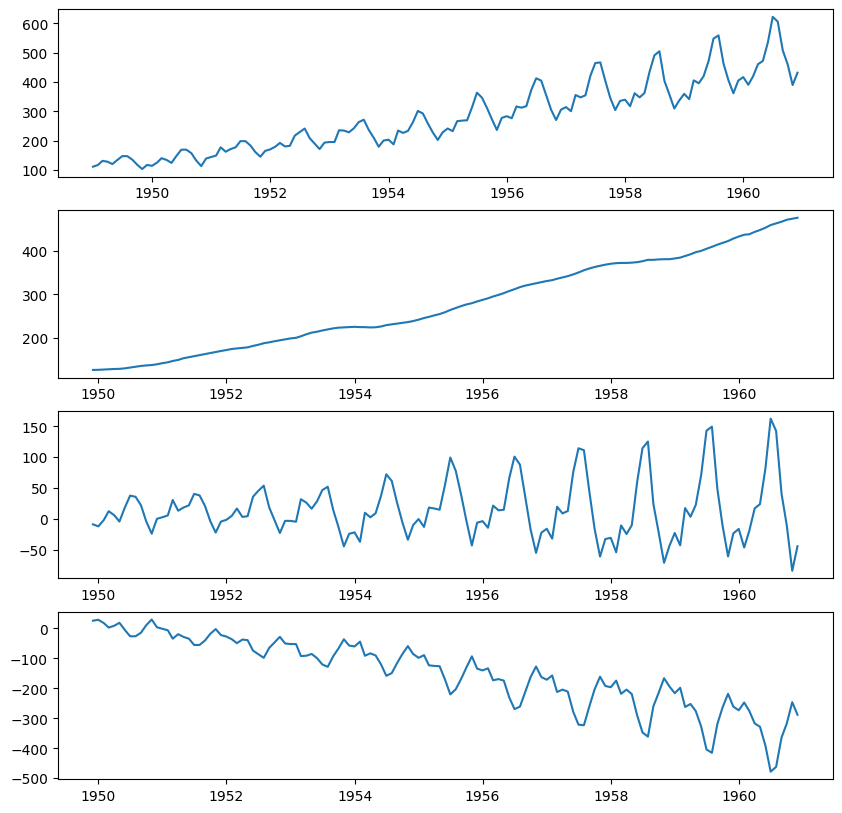

In [26]:
# TS = T + S + E
# E = TS - T - S

# Trend
yearly_trend = df.rolling(window=12).mean()

# Seasonal effects
# Warning! When you extract the trend, you normally take into account the errors too.
# Here we are considering that the errors don't exist which will skew the noise calculation
# below.
seasonality = df["#Passengers"].values - yearly_trend.values.T[0]

# Noise 
noise = np.array(df["#Passengers"]).shape - np.array(yearly_trend)[:, 0] - seasonality

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 10))
ax[0].plot(df["Month"], df["#Passengers"], label="Original")
ax[1].plot(df["Month"], yearly_trend, label="Yearly trend")
ax[2].plot(df["Month"], seasonality, label="Seasonal effects")
ax[3].plot(df["Month"], noise, label="Noise")
plt.show()

In [18]:
np.array(df["#Passengers"]).shape

(144,)

In [21]:
np.array(yearly_trend)[:, 0].shape

(144,)

In [20]:
seasonality.shape

(144,)